In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load Data 

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


First pre-process the train data.

In [4]:
df_train.shape

(8523, 12)

The train data contains 8523 rows and 12 columns

In [13]:
df_test.shape

(5681, 11)

The test data contains 5681 rows and 11 columns

In [5]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Check for missing values

In [8]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

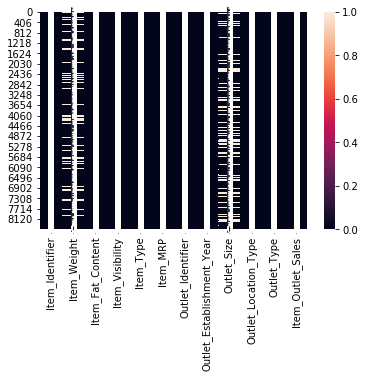

In [9]:
sns.heatmap(df_train.isnull(),annot=True)

Item_Weight has 1463 null values and Outlet_Size has 2410 null values.

Resolving the null values

In [10]:
df_train['Item_Weight'] = df_train.fillna(df_train['Item_Weight'].mean())

In [11]:
df_train['Outlet_Size'] = df_train.fillna(df_train['Outlet_Size'].mode()[0])

In [12]:
df_train.isnull().sum().sum()

0

The missing values has been resolved.

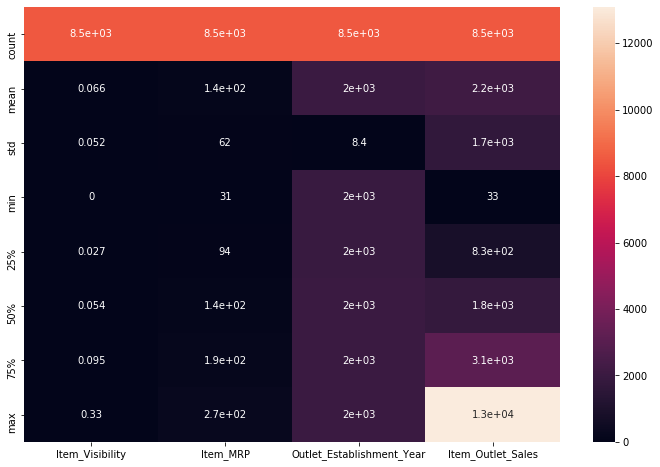

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.describe(),annot=True)

# UNIVARIATE ANALYSIS

Now check for categorical variavbles.

In [15]:
categorical_variables = df_train.select_dtypes(include=['object'])
categorical_variables

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,FDA15,Low Fat,Dairy,OUT049,FDA15,Tier 1,Supermarket Type1
1,DRC01,DRC01,Regular,Soft Drinks,OUT018,DRC01,Tier 3,Supermarket Type2
2,FDN15,FDN15,Low Fat,Meat,OUT049,FDN15,Tier 1,Supermarket Type1
3,FDX07,FDX07,Regular,Fruits and Vegetables,OUT010,FDX07,Tier 3,Grocery Store
4,NCD19,NCD19,Low Fat,Household,OUT013,NCD19,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...
8518,FDF22,FDF22,Low Fat,Snack Foods,OUT013,FDF22,Tier 3,Supermarket Type1
8519,FDS36,FDS36,Regular,Baking Goods,OUT045,FDS36,Tier 2,Supermarket Type1
8520,NCJ29,NCJ29,Low Fat,Health and Hygiene,OUT035,NCJ29,Tier 2,Supermarket Type1
8521,FDN46,FDN46,Regular,Snack Foods,OUT018,FDN46,Tier 3,Supermarket Type2


Using countplot we get the categorical variables visually.

FDG33    10
FDW13    10
NCI54     9
FDP25     9
FDO19     9
         ..
FDE52     1
FDT35     1
FDO33     1
FDK57     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64


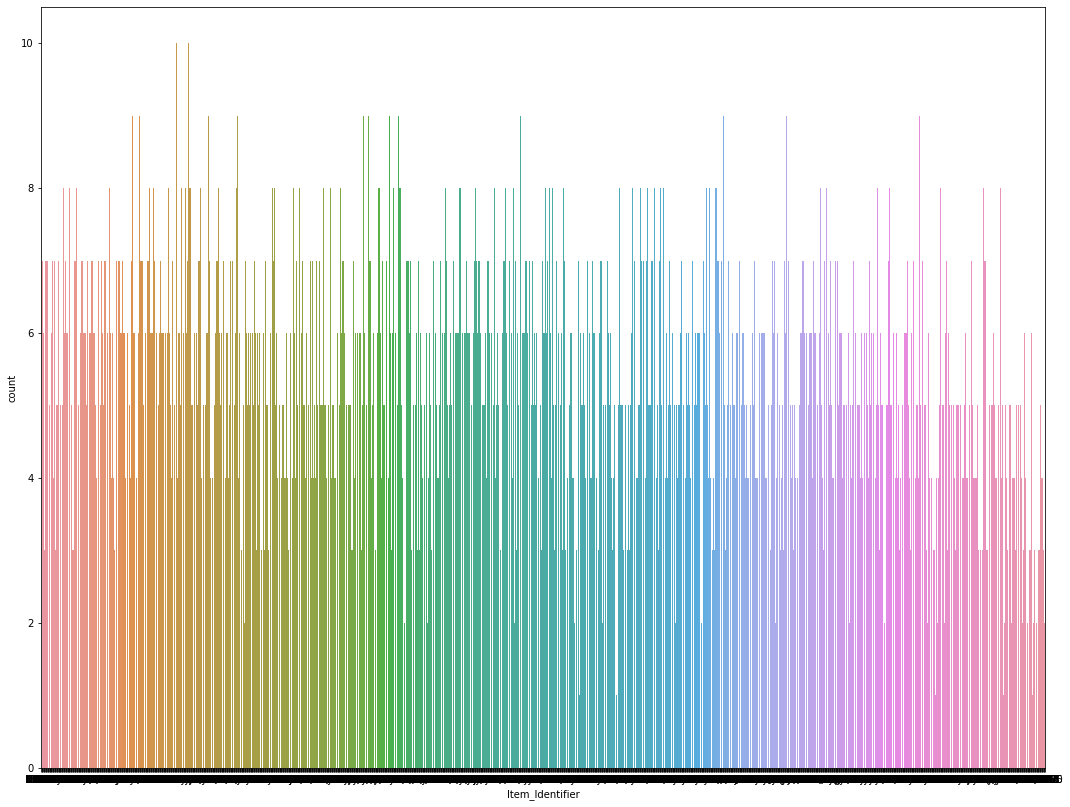

In [16]:
print(df_train['Item_Identifier'].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df_train['Item_Identifier'])

FDG33    10
FDW13    10
NCI54     9
FDP25     9
FDO19     9
         ..
FDE52     1
FDT35     1
FDO33     1
FDK57     1
FDQ60     1
Name: Item_Weight, Length: 1559, dtype: int64


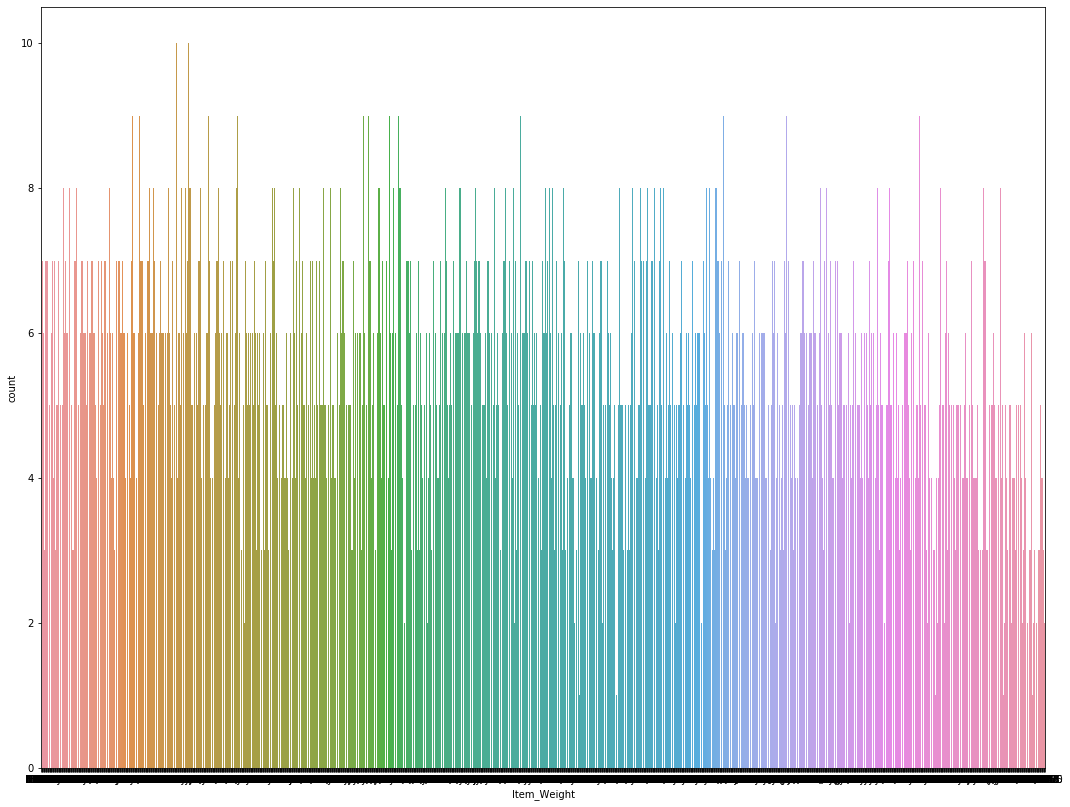

In [17]:
print(df_train['Item_Weight'].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df_train['Item_Weight'])

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


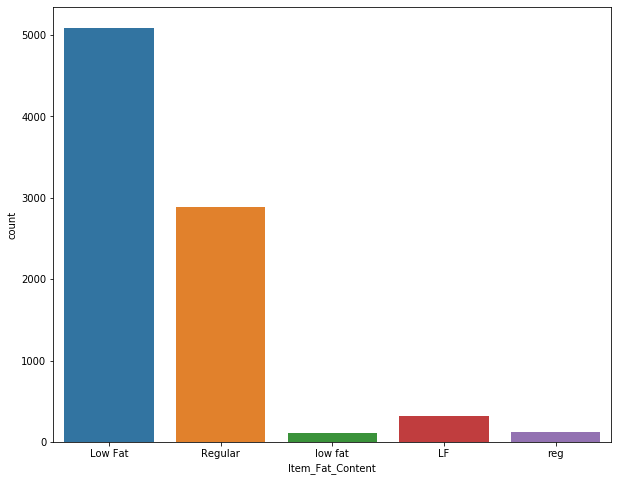

In [18]:
print(df_train['Item_Fat_Content'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(df_train['Item_Fat_Content'])

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


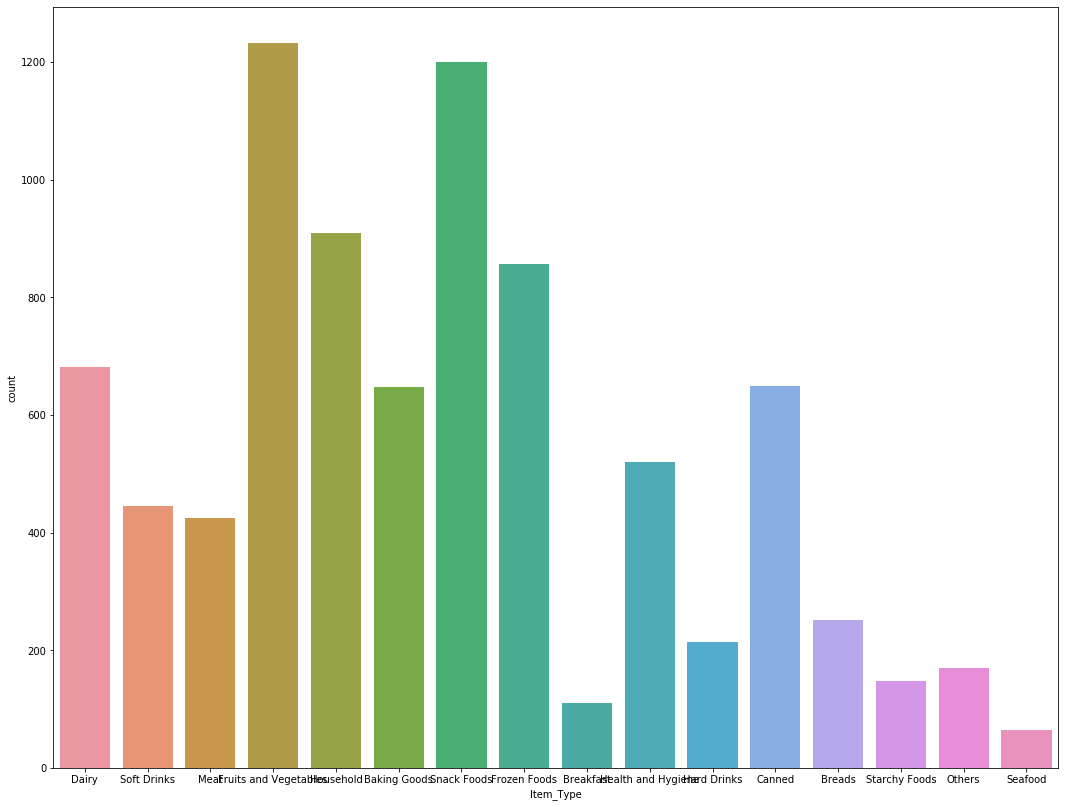

In [19]:
print(df_train['Item_Type'].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df_train['Item_Type'])

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


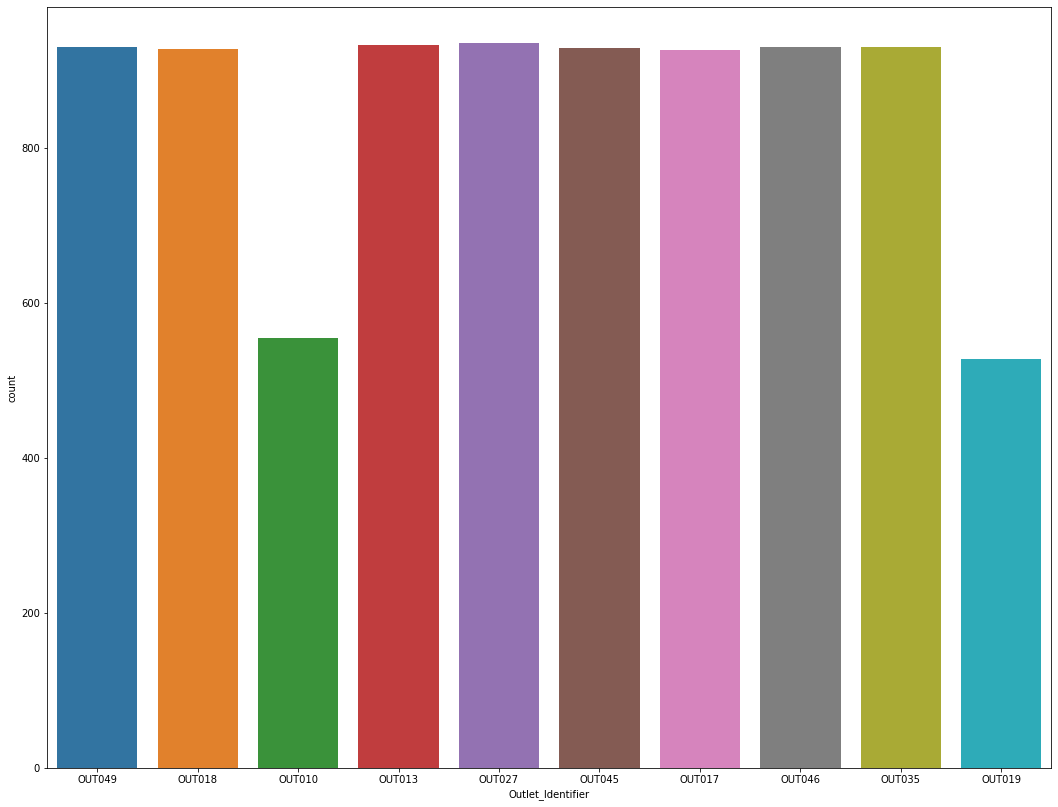

In [20]:
print(df_train['Outlet_Identifier'].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df_train['Outlet_Identifier'])

FDG33    10
FDW13    10
NCI54     9
FDP25     9
FDO19     9
         ..
FDE52     1
FDT35     1
FDO33     1
FDK57     1
FDQ60     1
Name: Outlet_Size, Length: 1559, dtype: int64


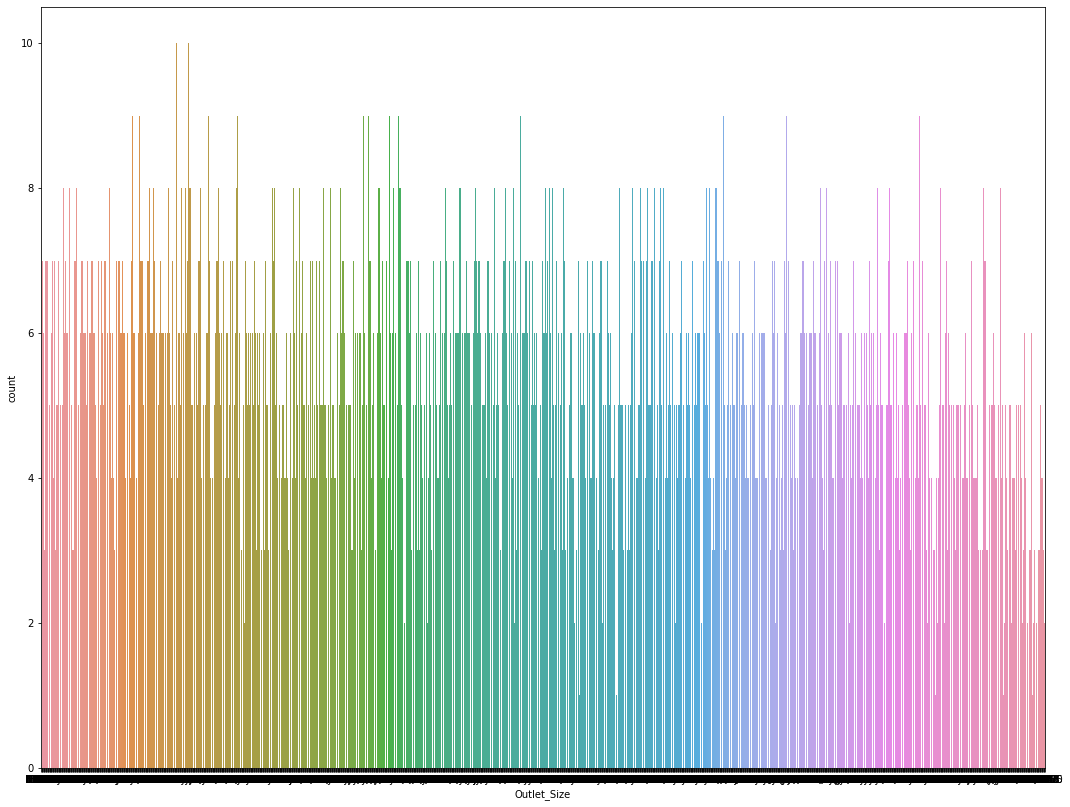

In [21]:
print(df_train['Outlet_Size'].value_counts())
plt.figure(figsize=(18,14))
sns.countplot(df_train['Outlet_Size'])

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


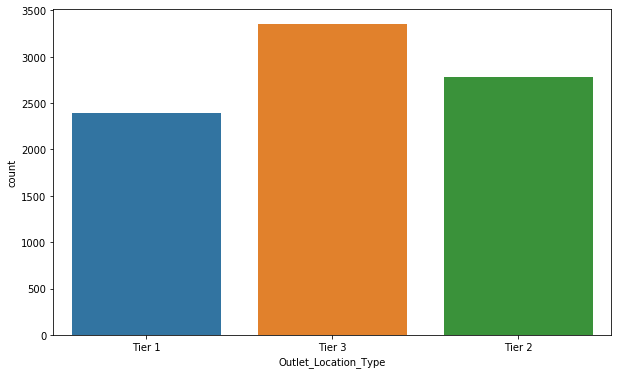

In [22]:
print(df_train['Outlet_Location_Type'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df_train['Outlet_Location_Type'])

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


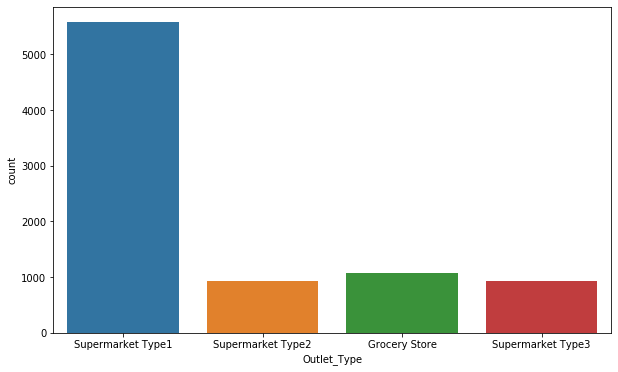

In [23]:
print(df_train['Outlet_Type'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df_train['Outlet_Type'])

Now check for numerical variables.

In [24]:
numerical_variables = df_train.select_dtypes(include=['float64'])
numerical_variables

,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.016047,249.8092,3735.1380
1,0.019278,48.2692,443.4228
2,0.016760,141.6180,2097.2700
3,0.000000,182.0950,732.3800
4,0.000000,53.8614,994.7052
...,...,...,...
8518,0.056783,214.5218,2778.3834
8519,0.046982,108.1570,549.2850
8520,0.035186,85.1224,1193.1136
8521,0.145221,103.1332,1845.5976


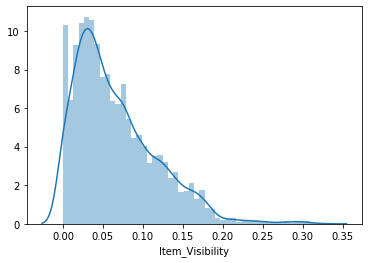

In [25]:
sns.distplot(df_train['Item_Visibility']) 

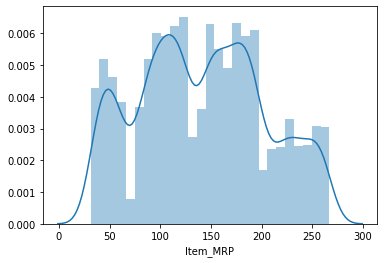

In [26]:
sns.distplot(df_train['Item_MRP'])

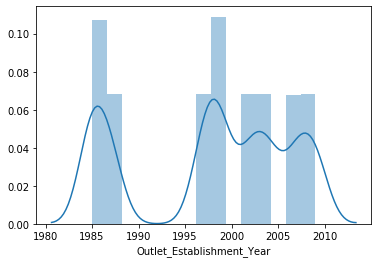

In [27]:
sns.distplot(df_train['Outlet_Establishment_Year']) #object type int32

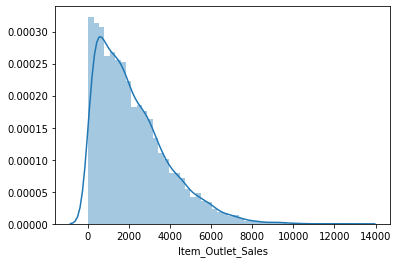

In [28]:
sns.distplot(df_train['Item_Outlet_Sales'])

# Encoding

converting categorical variables into numerical variables.

In [29]:
categorical_variables

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,FDA15,Low Fat,Dairy,OUT049,FDA15,Tier 1,Supermarket Type1
1,DRC01,DRC01,Regular,Soft Drinks,OUT018,DRC01,Tier 3,Supermarket Type2
2,FDN15,FDN15,Low Fat,Meat,OUT049,FDN15,Tier 1,Supermarket Type1
3,FDX07,FDX07,Regular,Fruits and Vegetables,OUT010,FDX07,Tier 3,Grocery Store
4,NCD19,NCD19,Low Fat,Household,OUT013,NCD19,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...
8518,FDF22,FDF22,Low Fat,Snack Foods,OUT013,FDF22,Tier 3,Supermarket Type1
8519,FDS36,FDS36,Regular,Baking Goods,OUT045,FDS36,Tier 2,Supermarket Type1
8520,NCJ29,NCJ29,Low Fat,Health and Hygiene,OUT035,NCJ29,Tier 2,Supermarket Type1
8521,FDN46,FDN46,Regular,Snack Foods,OUT018,FDN46,Tier 3,Supermarket Type2


In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [31]:
for feature in categorical_variables:
    df_train[feature] = le.fit_transform(df_train[feature])
    print(df_train[feature])
    
df_train.head()

0        156
1          8
2        662
3       1121
4       1297
        ... 
8518     370
8519     897
8520    1357
8521     681
8522      50
Name: Item_Identifier, Length: 8523, dtype: int32
0        156
1          8
2        662
3       1121
4       1297
        ... 
8518     370
8519     897
8520    1357
8521     681
8522      50
Name: Item_Weight, Length: 8523, dtype: int32
0       1
1       2
2       1
3       2
4       1
       ..
8518    1
8519    2
8520    1
8521    2
8522    1
Name: Item_Fat_Content, Length: 8523, dtype: int32
0        4
1       14
2       10
3        6
4        9
        ..
8518    13
8519     0
8520     8
8521    13
8522    14
Name: Item_Type, Length: 8523, dtype: int32
0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet_Identifier, Length: 8523, dtype: int32
0        156
1          8
2        662
3       1121
4       1297
        ... 
8518     370
8519     897
8520    1357
8521     681


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,156,1,0.016047,4,249.8092,9,1999,156,0,1,3735.1380
1,8,8,2,0.019278,14,48.2692,3,2009,8,2,2,443.4228
2,662,662,1,0.016760,10,141.6180,9,1999,662,0,1,2097.2700
3,1121,1121,2,0.000000,6,182.0950,0,1998,1121,2,0,732.3800
4,1297,1297,1,0.000000,9,53.8614,1,1987,1297,2,1,994.7052


In [32]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,156,1,0.016047,4,249.8092,9,1999,156,0,1,3735.1380
1,8,8,2,0.019278,14,48.2692,3,2009,8,2,2,443.4228
2,662,662,1,0.016760,10,141.6180,9,1999,662,0,1,2097.2700
3,1121,1121,2,0.000000,6,182.0950,0,1998,1121,2,0,732.3800
4,1297,1297,1,0.000000,9,53.8614,1,1987,1297,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,370,1,0.056783,13,214.5218,1,1987,370,2,1,2778.3834
8519,897,897,2,0.046982,0,108.1570,7,2002,897,1,1,549.2850
8520,1357,1357,1,0.035186,8,85.1224,6,2004,1357,1,1,1193.1136
8521,681,681,2,0.145221,13,103.1332,3,2009,681,2,2,1845.5976


In [33]:
df_train.dtypes

Item_Identifier                int32
Item_Weight                    int32
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

Correlation Matrix

In [34]:
df_train.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,1.000000,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,1.000000,0.003656,-0.001178,0.002869
Item_Weight,1.000000,1.000000,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,1.000000,0.003656,-0.001178,0.002869
Item_Fat_Content,-0.098114,-0.098114,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.098114,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.025482,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,-0.025482,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,-0.017973,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.017973,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.012853,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.012853,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.008602,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,-0.008602,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.012772,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,-0.012772,-0.089216,-0.122304,-0.049135
Outlet_Size,1.000000,1.000000,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,1.000000,0.003656,-0.001178,0.002869
Outlet_Location_Type,0.003656,0.003656,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,0.003656,1.000000,0.467219,0.089367


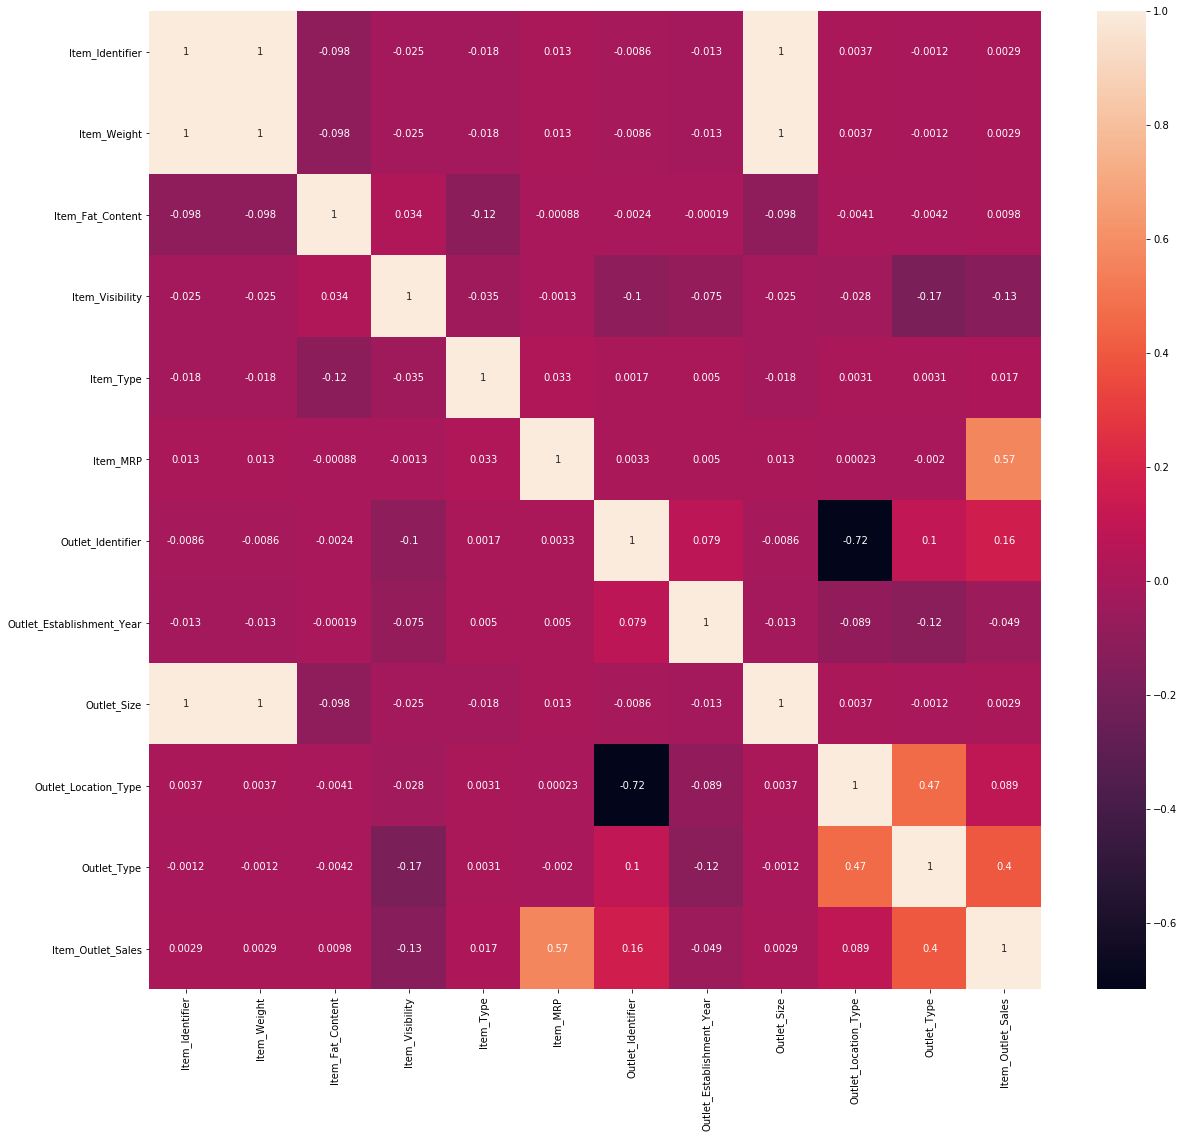

In [35]:
plt.figure(figsize=(20,18))
sns.heatmap(df_train.corr(),annot=True)

The correlation between Item_Identifier , Item_Weight and Outlet_Type has multicollinearity between these 3 variables.

Check for outliers

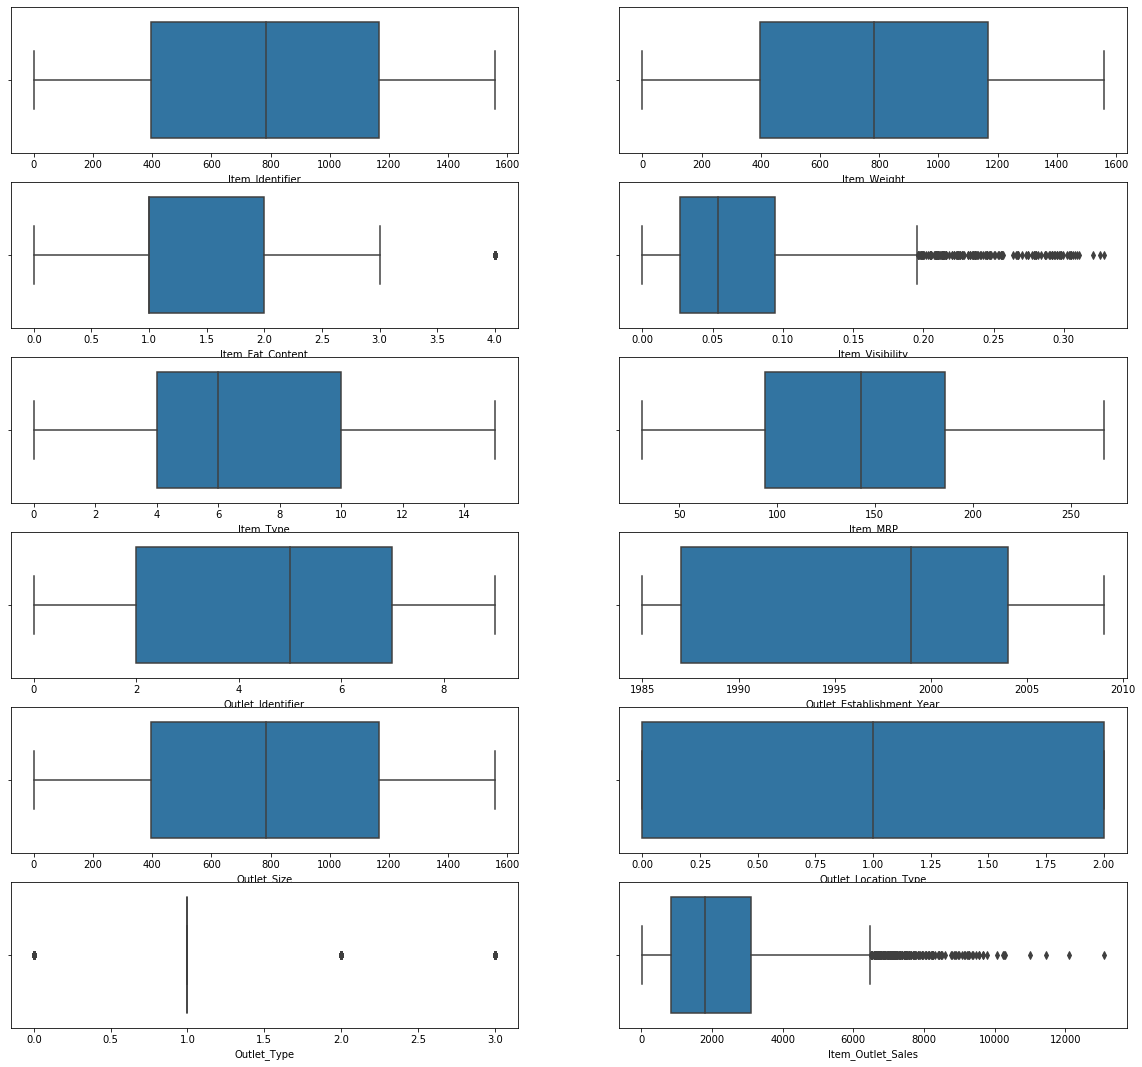

In [36]:
plt.figure(figsize=(20,22))
plot = 1
for i in df_train:
    if plot < 14:
        ax = plt.subplot(7,2,plot)
        sns.boxplot(df_train[i])
    plot += 1
plt.show()

ITEM VISIBILITY

In [37]:
print(df_train['Item_Visibility'].quantile(0.10))
print(df_train['Item_Visibility'].quantile(0.90))

0.012041769800000001
0.1395144032


In [38]:
df_train['Item_Visibility'] = np.where(df_train['Item_Visibility'] > 0.1395144032,0.1395144032,df_train['Item_Visibility'])

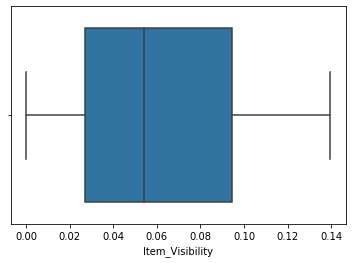

In [39]:
sns.boxplot(df_train['Item_Visibility'])

ITEM OUTLET SALES

In [40]:
print(df_train['Item_Outlet_Sales'].quantile(0.10))
print(df_train['Item_Outlet_Sales'].quantile(0.90))

343.5528
4570.0512


In [41]:
df_train['Item_Outlet_Sales'] = np.where(df_train['Item_Outlet_Sales'] > 4570.0512,4570.0512,df_train['Item_Outlet_Sales'])

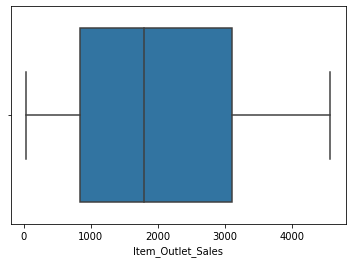

In [42]:
sns.boxplot(df_train['Item_Outlet_Sales'])

The outliers has been removed.

# Skewness

In [43]:
df_train.skew()

Item_Identifier             -0.008877
Item_Weight                 -0.008877
Item_Fat_Content             0.994824
Item_Visibility              0.440416
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.008877
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            0.437012
dtype: float64

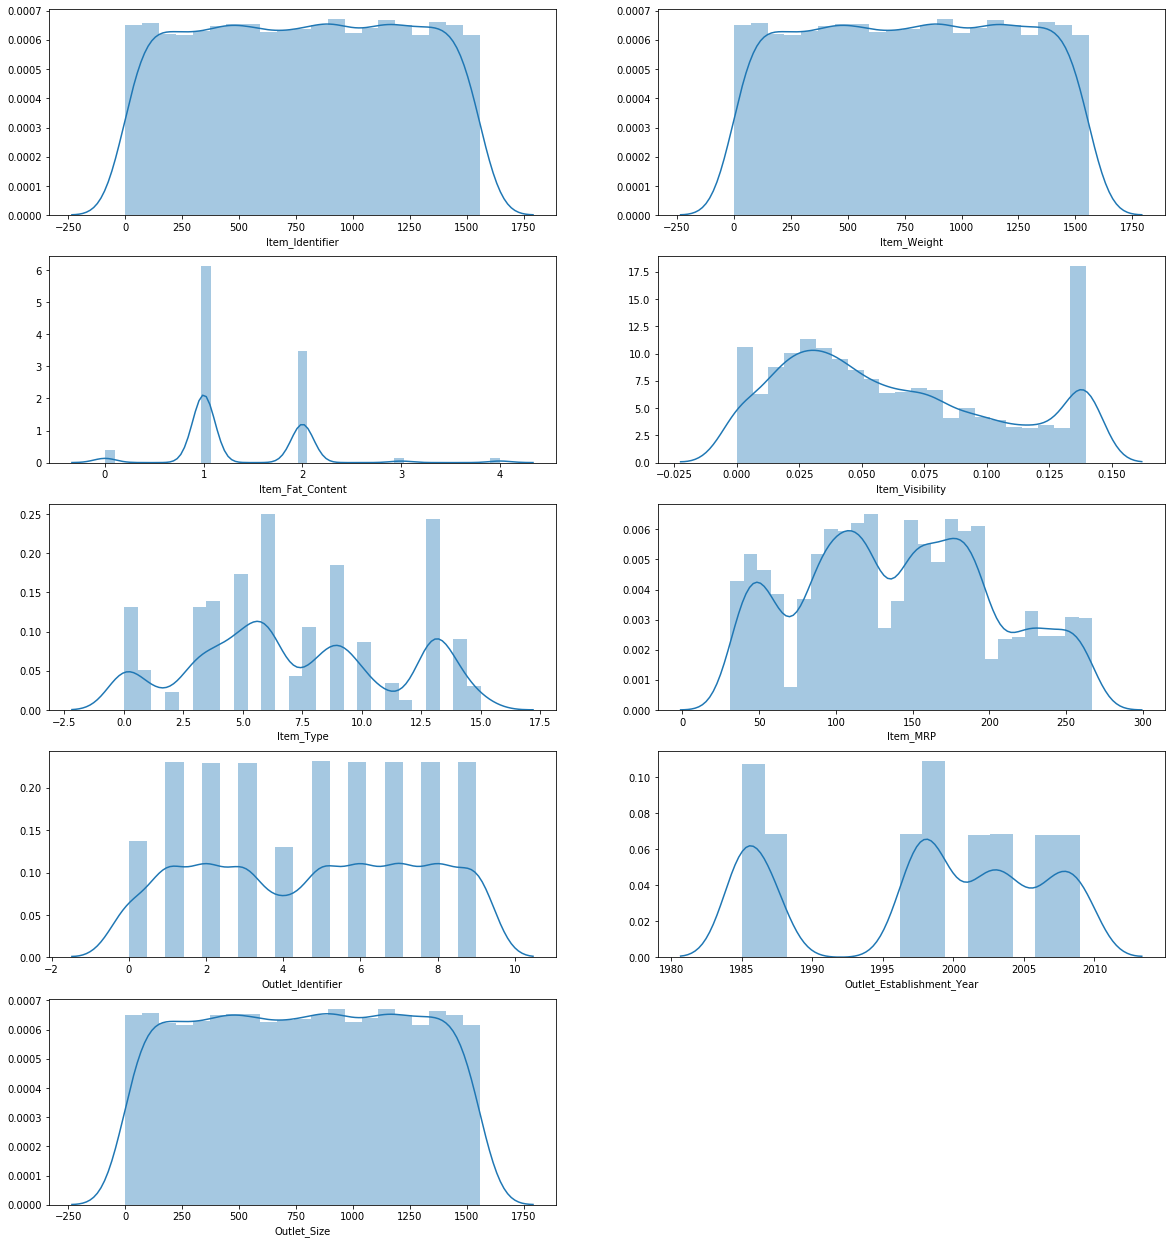

In [44]:
plt.figure(figsize=(20,22))
plot = 1
for i in df_train:
    if plot < 10:
        ax = plt.subplot(5,2,plot)
        sns.distplot(df_train[i])
    plot += 1
plt.show()

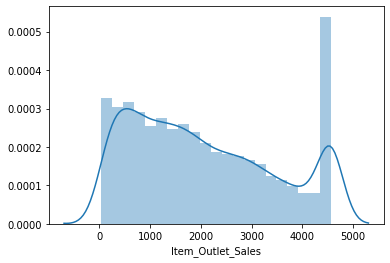

In [45]:
sns.distplot(df_train['Item_Outlet_Sales'])

Target Variable : Item_Outlet_Sales

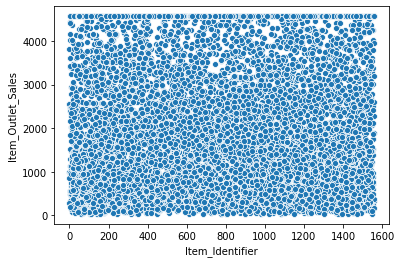

In [46]:
sns.scatterplot(x=df_train['Item_Identifier'],y=df_train['Item_Outlet_Sales'])

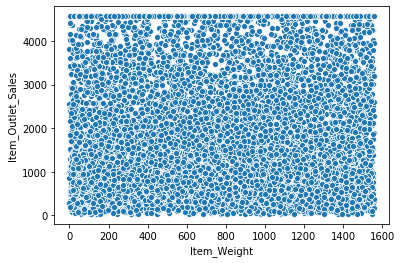

In [47]:
sns.scatterplot(x=df_train['Item_Weight'],y=df_train['Item_Outlet_Sales'])

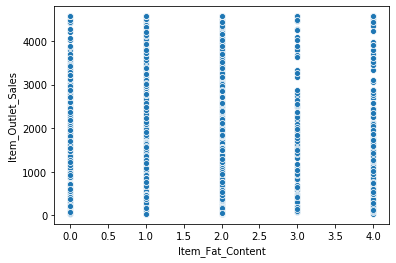

In [48]:
sns.scatterplot(x=df_train['Item_Fat_Content'],y=df_train['Item_Outlet_Sales'])

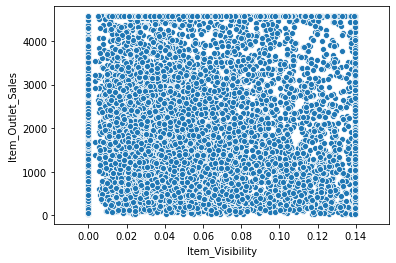

In [49]:
sns.scatterplot(x=df_train['Item_Visibility'],y=df_train['Item_Outlet_Sales'])

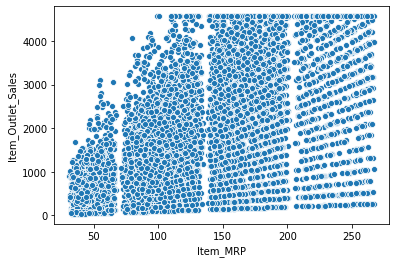

In [50]:
sns.scatterplot(x=df_train['Item_MRP'],y=df_train['Item_Outlet_Sales'])

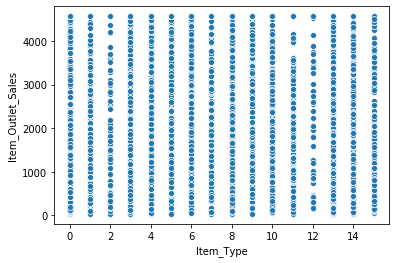

In [51]:
sns.scatterplot(x=df_train['Item_Type'],y=df_train['Item_Outlet_Sales'])

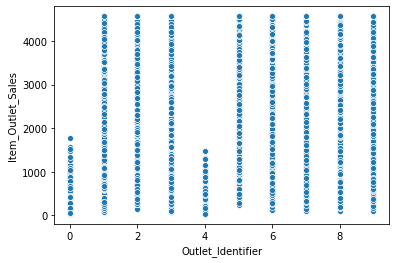

In [52]:
sns.scatterplot(x=df_train['Outlet_Identifier'],y=df_train['Item_Outlet_Sales'])

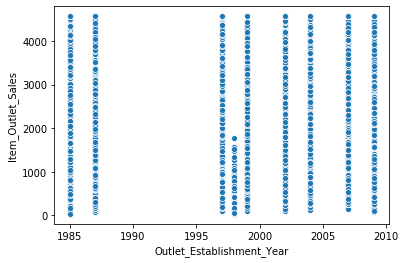

In [53]:
sns.scatterplot(x=df_train['Outlet_Establishment_Year'],y=df_train['Item_Outlet_Sales'])

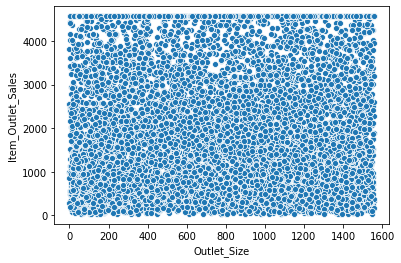

In [54]:
sns.scatterplot(x=df_train['Outlet_Size'],y=df_train['Item_Outlet_Sales'])

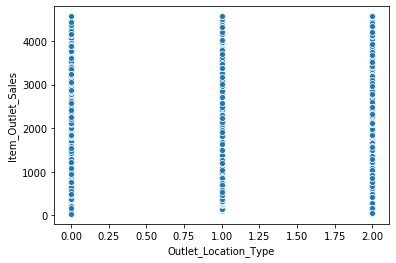

In [55]:
sns.scatterplot(x=df_train['Outlet_Location_Type'],y=df_train['Item_Outlet_Sales'])

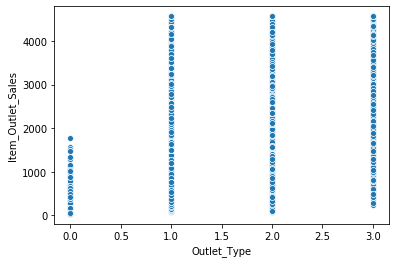

In [56]:
sns.scatterplot(x=df_train['Outlet_Type'],y=df_train['Item_Outlet_Sales'])

In [57]:
X = df_train.drop(['Item_Identifier','Outlet_Type','Item_Weight'],axis=1)
Y = df_train['Item_Outlet_Sales']

In [58]:
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,1,0.016047,4,249.8092,9,1999,156,0,3735.1380
1,2,0.019278,14,48.2692,3,2009,8,2,443.4228
2,1,0.016760,10,141.6180,9,1999,662,0,2097.2700
3,2,0.000000,6,182.0950,0,1998,1121,2,732.3800
4,1,0.000000,9,53.8614,1,1987,1297,2,994.7052


Scaling the feature variables.

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_Scaled = scaler.fit_transform(X)

X_Scaled

array([[-0.57284357, -1.07826501, -0.76647929, ..., -1.38851383,
        -1.36933384,  1.19487736],
       [ 0.97809218, -1.00337768,  1.6089627 , ..., -1.71799137,
         1.09156913, -1.14383125],
       [-0.57284357, -1.06174408,  0.6587859 , ..., -0.26205684,
        -1.36933384,  0.03119953],
       ...,
       [-0.57284357, -0.63465497,  0.1836975 , ...,  1.28515188,
        -0.13888236, -0.61118847],
       [ 0.97809218,  1.78350065,  1.3714185 , ..., -0.21975905,
         1.09156913, -0.1476095 ],
       [-0.57284357, -0.41001004,  1.6089627 , ..., -1.62449099,
        -1.36933384, -0.91488   ]])

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_Scaled,i) for i in range(X_Scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.025775,Item_Fat_Content
1,1.031441,Item_Visibility
2,1.016919,Item_Type
3,1.603598,Item_MRP
4,2.499808,Outlet_Identifier
5,1.011848,Outlet_Establishment_Year
6,1.011866,Outlet_Size
7,2.389895,Outlet_Location_Type
8,1.832777,Item_Outlet_Sales


In [61]:
X_Scaled.shape

(8523, 9)

In [62]:
Y.shape

(8523,)

# Model Building

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25)

In [65]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    a=r2_score(y_test,y_pred)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  100.0 found on random state 1


In [66]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr_acc = r2_score(y_test,y_pred)*100
print(lr_acc)

100.0


In [67]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=i)
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    y_pred_1=dt.predict(x_test)
    a=r2_score(y_test,y_pred_1)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  99.99993241978648 found on random state 70


In [68]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=70)
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_1=dt.predict(x_test)
dt_accu = r2_score(y_test,y_pred_1)*100
print(dt_accu)

99.99991518751169


In [69]:
best_rstate=0
accu=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    y_pred_2=rf.predict(x_test)
    a=r2_score(y_test,y_pred_2)
    
    if a>accu:
        accu=a
        best_rstate=i
        
        
print('Best accuracy is ',(accu*100),'found on random state',(best_rstate))

Best accuracy is  99.99997618837595 found on random state 15


In [70]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.25,random_state=15)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_2=rf.predict(x_test)
rf_accu = r2_score(y_test,y_pred_2)*100
print(rf_accu)

99.99997462241964


# Cross - Validation

In [71]:
lr_score = cross_val_score(lr,X_Scaled,Y,cv=5)
lr_score.mean()

1.0

In [72]:
dt_score = cross_val_score(dt,X_Scaled,Y,cv=5)
dt_score.mean()

0.9999992234716414

In [73]:
rf_score = cross_val_score(rf,X_Scaled,Y,cv=5)
rf_score.mean()

0.9999997036257178

# Error Rate

In [74]:
print(mean_absolute_error(y_test,y_pred))

1617.9002487095267


In [75]:
print(mean_squared_error(y_test,y_pred))

4058639.062021081


In [76]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

2014.6064285664038


In [77]:
print(mean_absolute_error(y_test,y_pred_1))

1627.5204494603538


In [78]:
print(mean_squared_error(y_test,y_pred_1))

4076251.8424612624


In [79]:
print(np.sqrt(mean_squared_error(y_test,y_pred_1)))

2018.972967243807


In [80]:
print(mean_absolute_error(y_test,y_pred_2))

0.43512888784983683


In [81]:
print(mean_squared_error(y_test,y_pred_2))

0.505990515348506


In [82]:
print(np.sqrt(mean_squared_error(y_test,y_pred_2)))

0.7113301029399122


# Pre-Process for Test Data

In [83]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [84]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [85]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [86]:
df_test['Item_Weight'] = df_test.fillna(df_test['Item_Weight'].mean())

In [87]:
df_test['Outlet_Size'] = df_test.fillna(df_test['Outlet_Size'].mode()[0])

In [88]:
df_test.isnull().sum().sum()

0

In [89]:
df_test.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000
mean,0.065684,141.023273,1997.828903
std,0.051252,61.809091,8.372256
min,0.000000,31.990000,1985.000000
25%,0.027047,94.412000,1987.000000
50%,0.054154,141.415400,1999.000000
75%,0.093463,186.026600,2004.000000
max,0.323637,266.588400,2009.000000


Encoding

In [90]:
cat = df_test.select_dtypes(include=['object'])
cat

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,FDW58,Low Fat,Snack Foods,OUT049,FDW58,Tier 1,Supermarket Type1
1,FDW14,FDW14,reg,Dairy,OUT017,FDW14,Tier 2,Supermarket Type1
2,NCN55,NCN55,Low Fat,Others,OUT010,NCN55,Tier 3,Grocery Store
3,FDQ58,FDQ58,Low Fat,Snack Foods,OUT017,FDQ58,Tier 2,Supermarket Type1
4,FDY38,FDY38,Regular,Dairy,OUT027,FDY38,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...
5676,FDB58,FDB58,Regular,Snack Foods,OUT046,FDB58,Tier 1,Supermarket Type1
5677,FDD47,FDD47,Regular,Starchy Foods,OUT018,FDD47,Tier 3,Supermarket Type2
5678,NCO17,NCO17,Low Fat,Health and Hygiene,OUT045,NCO17,Tier 2,Supermarket Type1
5679,FDJ26,FDJ26,Regular,Canned,OUT017,FDJ26,Tier 2,Supermarket Type1


In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature1 in cat:
    df_test[feature1] = le.fit_transform(df_test[feature1])
    print(df_test[feature1])
    
df_test.head()

0       1103
1       1067
2       1406
3        809
4       1184
        ... 
5676     231
5677     306
5678    1412
5679     517
5680     987
Name: Item_Identifier, Length: 5681, dtype: int32
0       1103
1       1067
2       1406
3        809
4       1184
        ... 
5676     231
5677     306
5678    1412
5679     517
5680     987
Name: Item_Weight, Length: 5681, dtype: int32
0       1
1       4
2       1
3       1
4       2
       ..
5676    2
5677    2
5678    1
5679    2
5680    2
Name: Item_Fat_Content, Length: 5681, dtype: int32
0       13
1        4
2       11
3       13
4        4
        ..
5676    13
5677    15
5678     8
5679     3
5680     3
Name: Item_Type, Length: 5681, dtype: int32
0       9
1       2
2       0
3       2
4       5
       ..
5676    8
5677    3
5678    7
5679    2
5680    7
Name: Outlet_Identifier, Length: 5681, dtype: int32
0       1103
1       1067
2       1406
3        809
4       1184
        ... 
5676     231
5677     306
5678    1412
5679     517


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1103,1,0.007565,13,107.8622,9,1999,1103,0,1
1,1067,1067,4,0.038428,4,87.3198,2,2007,1067,1,1
2,1406,1406,1,0.099575,11,241.7538,0,1998,1406,2,0
3,809,809,1,0.015388,13,155.0340,2,2007,809,1,1
4,1184,1184,2,0.118599,4,234.2300,5,1985,1184,2,3


In [92]:
df_test.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,1.000000,1.000000,-0.093344,-0.063856,-0.003236,0.007537,0.010162,0.011728,1.000000,-0.011657,-0.009553
Item_Weight,1.000000,1.000000,-0.093344,-0.063856,-0.003236,0.007537,0.010162,0.011728,1.000000,-0.011657,-0.009553
Item_Fat_Content,-0.093344,-0.093344,1.000000,0.033591,-0.128945,-0.014283,-0.000792,-0.010088,-0.093344,-0.000130,0.000387
Item_Visibility,-0.063856,-0.063856,0.033591,1.000000,-0.036237,-0.014013,-0.114857,-0.097040,-0.063856,-0.001146,-0.154042
Item_Type,-0.003236,-0.003236,-0.128945,-0.036237,1.000000,0.060990,0.000333,0.000204,-0.003236,0.000584,0.006179
Item_MRP,0.007537,0.007537,-0.014283,-0.014013,0.060990,1.000000,-0.006412,-0.007233,0.007537,0.001754,0.003326
Outlet_Identifier,0.010162,0.010162,-0.000792,-0.114857,0.000333,-0.006412,1.000000,0.079065,0.010162,-0.716113,0.099937
Outlet_Establishment_Year,0.011728,0.011728,-0.010088,-0.097040,0.000204,-0.007233,0.079065,1.000000,0.011728,-0.089496,-0.122841
Outlet_Size,1.000000,1.000000,-0.093344,-0.063856,-0.003236,0.007537,0.010162,0.011728,1.000000,-0.011657,-0.009553
Outlet_Location_Type,-0.011657,-0.011657,-0.000130,-0.001146,0.000584,0.001754,-0.716113,-0.089496,-0.011657,1.000000,0.467299


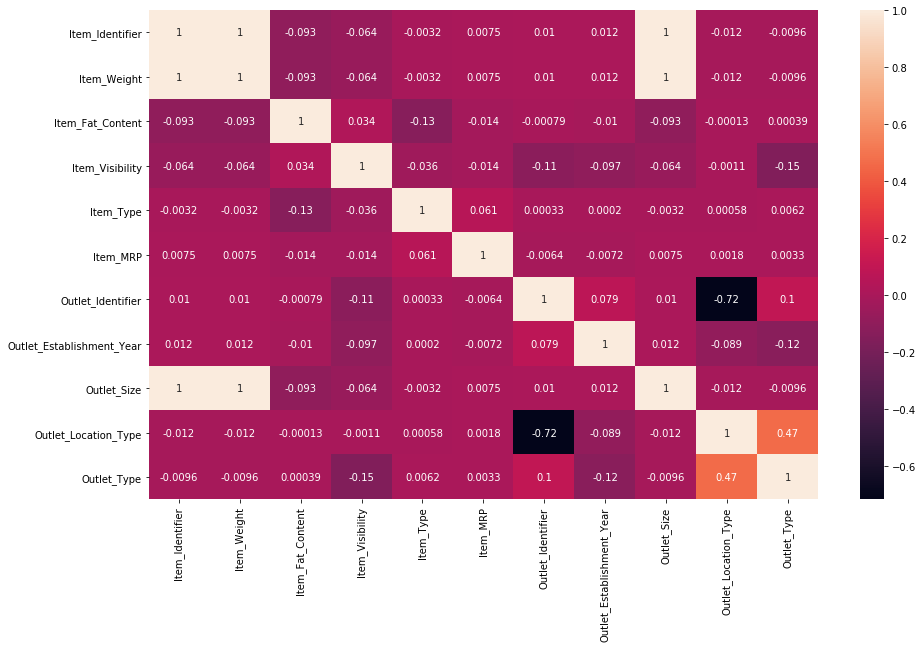

In [93]:
plt.figure(figsize=(15,9))
sns.heatmap(df_test.corr(),annot=True)

Remove Item_Identifier,Item_Weight, are very collinear to each other.

In [94]:
df_test 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1103,1,0.007565,13,107.8622,9,1999,1103,0,1
1,1067,1067,4,0.038428,4,87.3198,2,2007,1067,1,1
2,1406,1406,1,0.099575,11,241.7538,0,1998,1406,2,0
3,809,809,1,0.015388,13,155.0340,2,2007,809,1,1
4,1184,1184,2,0.118599,4,234.2300,5,1985,1184,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,231,2,0.013496,13,141.3154,8,1997,231,0,1
5677,306,306,2,0.142991,15,169.1448,3,2009,306,2,2
5678,1412,1412,1,0.073529,8,118.7440,7,2002,1412,1,1
5679,517,517,2,0.000000,3,214.6218,2,2007,517,1,1


In [95]:
df_test = df_test.drop(['Item_Identifier','Item_Weight'],axis=1)

df_test

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,0.007565,13,107.8622,9,1999,1103,0,1
1,4,0.038428,4,87.3198,2,2007,1067,1,1
2,1,0.099575,11,241.7538,0,1998,1406,2,0
3,1,0.015388,13,155.0340,2,2007,809,1,1
4,2,0.118599,4,234.2300,5,1985,1184,2,3
...,...,...,...,...,...,...,...,...,...
5676,2,0.013496,13,141.3154,8,1997,231,0,1
5677,2,0.142991,15,169.1448,3,2009,306,2,2
5678,1,0.073529,8,118.7440,7,2002,1412,1,1
5679,2,0.000000,3,214.6218,2,2007,517,1,1


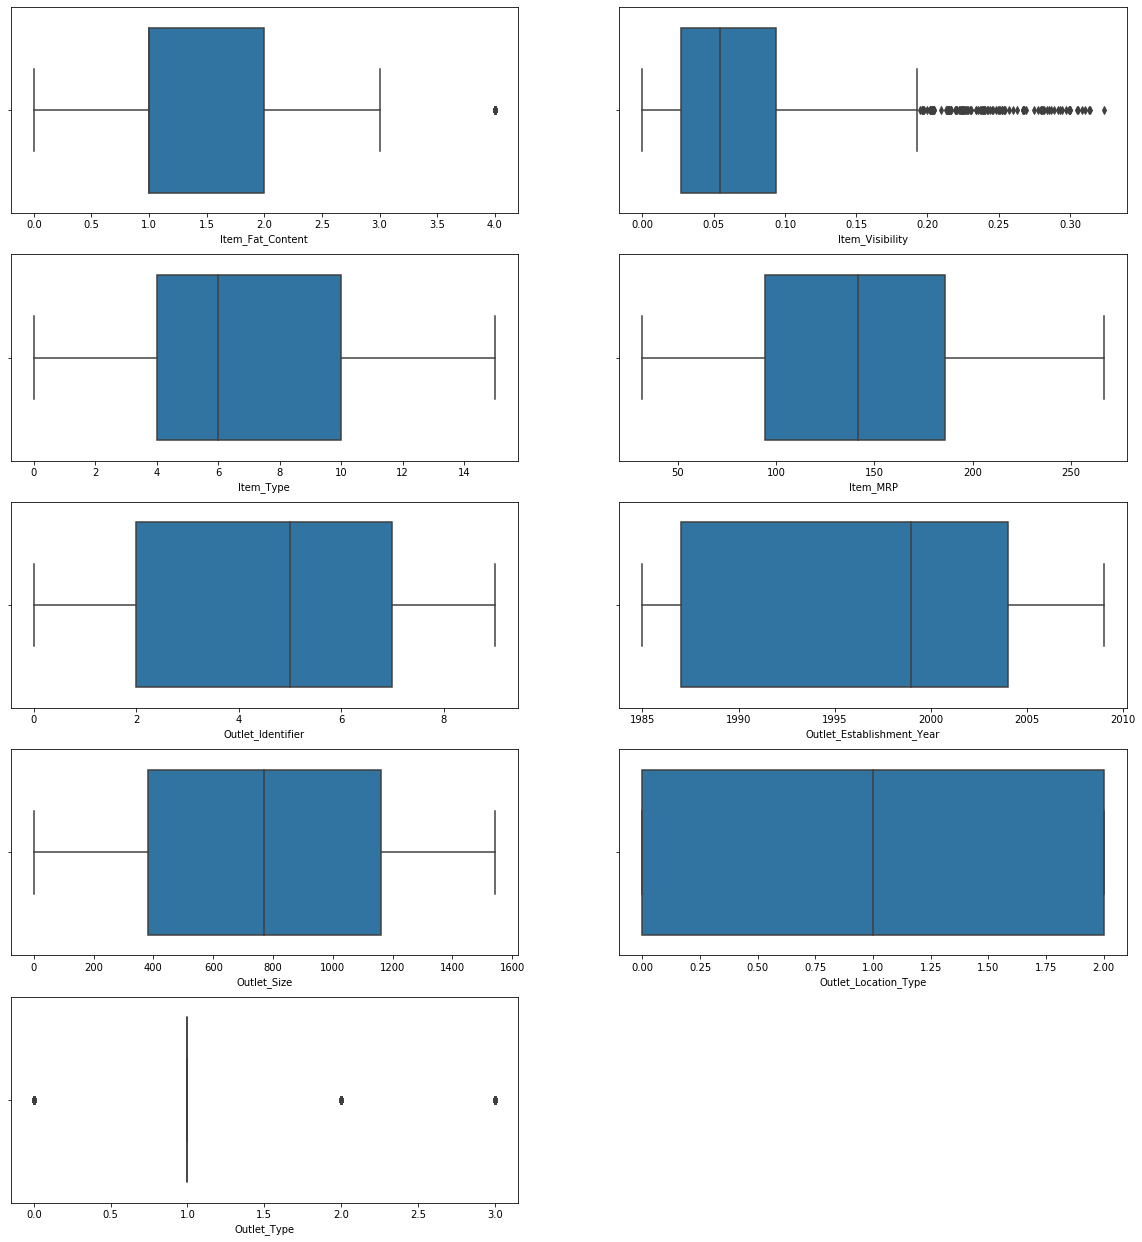

In [96]:
plt.figure(figsize=(20,22))
plot = 1
for i in df_test:
    if plot < 10:
        ax = plt.subplot(5,2,plot)
        sns.boxplot(df_test[i])
    plot += 1
plt.show()

In [97]:
print(df_test['Item_Visibility'].quantile(0.10))
print(df_test['Item_Visibility'].quantile(0.90))

0.011390653999999998
0.135767734


In [98]:
df_test['Item_Visibility'] = np.where(df_test['Item_Visibility'] > 0.135767734,0.135767734,df_test['Item_Visibility'])

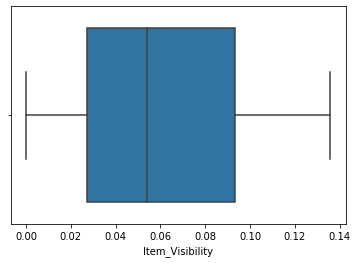

In [99]:
sns.boxplot(df_test['Item_Visibility'])

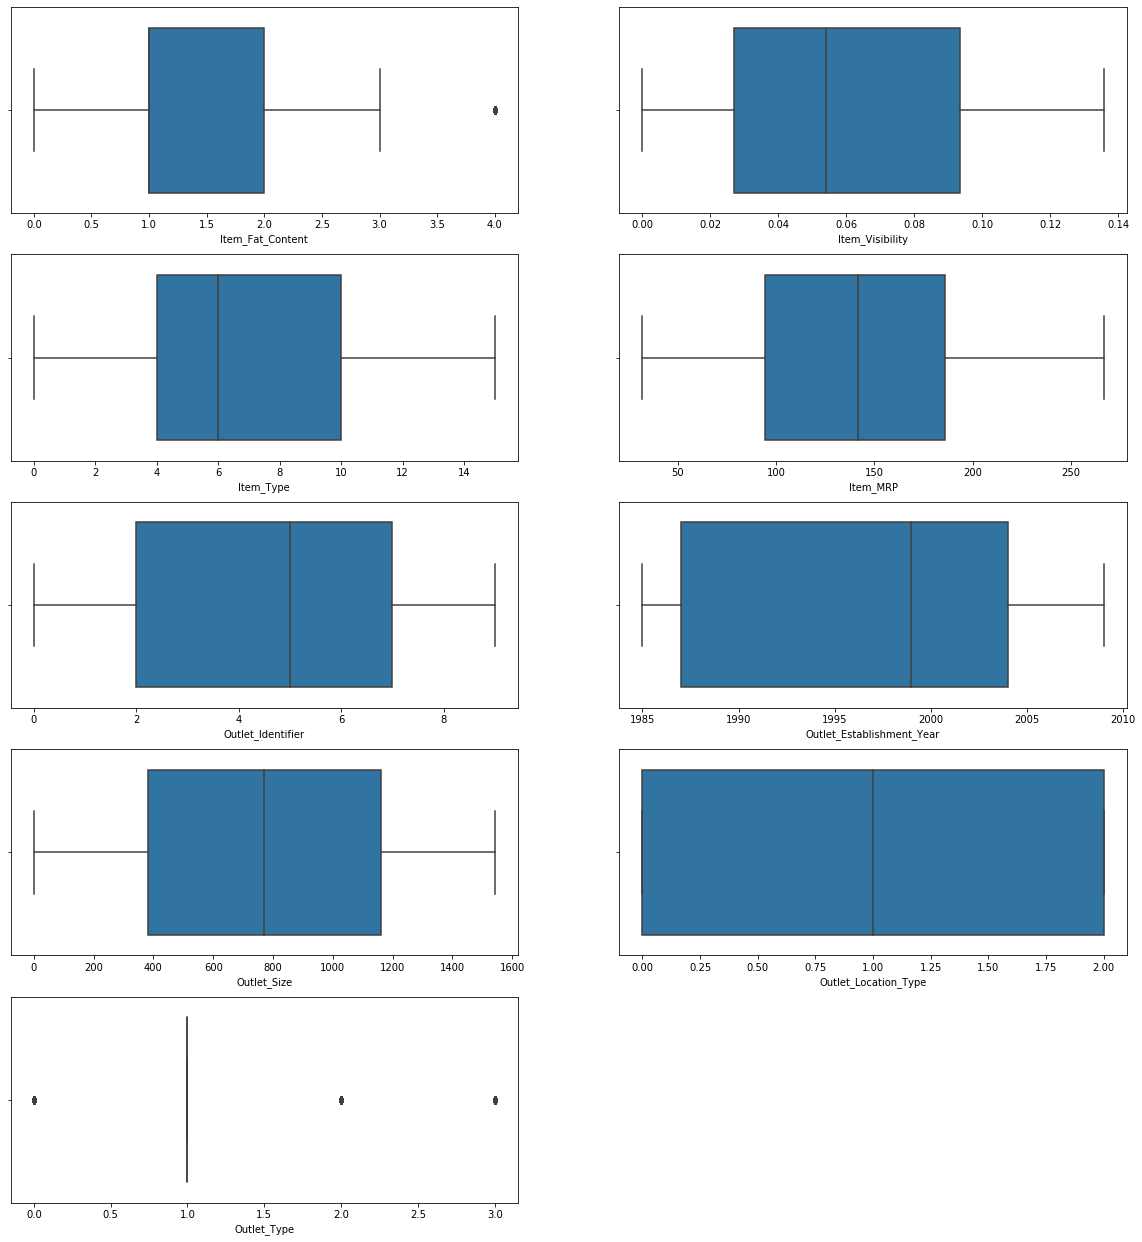

In [100]:
plt.figure(figsize=(20,22))
plot = 1
for i in df_test:
    if plot < 10:
        ax = plt.subplot(5,2,plot)
        sns.boxplot(df_test[i])
    plot += 1
plt.show()

The test data is predicted with the model which we have trained the model

In [101]:
predictions = lr.predict(df_test)

predictions

array([3460.84954504, 3460.84954504, 2053.35688485, ..., 3460.84954504,
       3460.84954504, 3460.84954504])

In [102]:
df_test['Predictions'] = predictions

In [103]:
df_test

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predictions
0,1,0.007565,13,107.8622,9,1999,1103,0,1,3460.849545
1,4,0.038428,4,87.3198,2,2007,1067,1,1,3460.849545
2,1,0.099575,11,241.7538,0,1998,1406,2,0,2053.356885
3,1,0.015388,13,155.0340,2,2007,809,1,1,3460.849545
4,2,0.118599,4,234.2300,5,1985,1184,2,3,6275.834865
...,...,...,...,...,...,...,...,...,...,...
5676,2,0.013496,13,141.3154,8,1997,231,0,1,3460.849545
5677,2,0.135768,15,169.1448,3,2009,306,2,2,4868.342205
5678,1,0.073529,8,118.7440,7,2002,1412,1,1,3460.849545
5679,2,0.000000,3,214.6218,2,2007,517,1,1,3460.849545
